# Brain Tumor MRI Classification 

**Project Overview and Objective:**

The main purpose of this project was to build a CNN model that would classify if subject has a tumor or not base on MRI scan. I used the VGG-16, VGG-19, Inception v3 model architecture and custom built model to train the model for this binary problem. Used accuracy as a metric to justify the model performance.

**Dataset Description:**

The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:

NO - no tumor, encoded as 0

YES - tumor, encoded as 1

**Loading Data and Preprocessing:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
PATH = os.getcwd()

In [ ]:
PATH

'/content'

In [ ]:
import cv2

In [ ]:
DATA_PATH_TRN = os.path.join(PATH, '/content/drive/My Drive/Task 4/train')
data_dir_list = sorted(os.listdir(DATA_PATH_TRN))
print(data_dir_list)

['no', 'yes']


In [ ]:
img_rows=224
img_cols=224
num_channel=3
IMG_SIZE = (224,224)
num_epoch=10
batch_size=32

img_data_list=[]
classes_names_list=[]
labels_index = {}  
labels = []

**Reading Image as a single channel grayscale image and used in CNN model.**

In [ ]:
import cv2

for dataset in data_dir_list:
    classes_names_list.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    label_id = len(labels_index)
    labels_index[dataset] = label_id
    img_list=os.listdir(DATA_PATH_TRN+'/'+ dataset)
    for img in img_list:
        input_img=cv2.imread(DATA_PATH_TRN + '/'+ dataset + '/'+ img,cv2.IMREAD_GRAYSCALE)
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        img_data_list.append(input_img_resize)
        labels.append(label_id)

Loading images from no folder

Loading images from yes folder



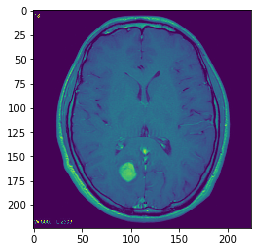

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img_data_list[120], interpolation='nearest')
plt.show()

In [ ]:
import numpy as np

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [ ]:
img_data.shape

(233, 224, 224)

In [ ]:
train1 = img_data

In [ ]:
num_classes = len(classes_names_list)
print(num_classes)

2


The image is made into three channels so that it can be used in transfer learning.

In [ ]:
def crop_imgs(set_name):

    set_new = []
    for img in set_name:
        stacked_img = np.stack((img,)*3, axis=-1)
        set_new.append(stacked_img)

    return np.array(set_new)

In [ ]:
train2 = crop_imgs(set_name=img_data)

In [ ]:
train2.shape

(233, 224, 224, 3)

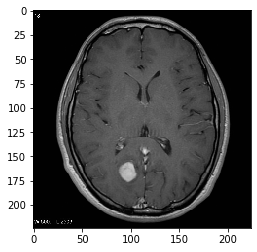

In [ ]:
plt.imshow(train2[120], interpolation='nearest')
plt.show()

In [ ]:
num_of_samples = img_data.shape[0]
input_shape = train1[0].shape

In [ ]:
input_shape1 = train2[0].shape

In [ ]:
input_shape1

(224, 224, 3)

In [ ]:
num_classes = len(classes_names_list)
print(num_classes)

2


In [ ]:
DATA_PATH_TST = os.path.join(PATH, '/content/drive/My Drive/Task 4/test')
data_dir_listtst = sorted(os.listdir(DATA_PATH_TST))
print(data_dir_listtst)

['no', 'yes']


In [ ]:
img_data_listtst=[]
classes_names_listtst=[]
labels_indextst = {}  
labels_tst = []

for dataset in data_dir_listtst:
    classes_names_listtst.append(dataset) 
    print ('Loading images from {} folder\n'.format(dataset)) 
    label_id = len(labels_indextst)
    labels_indextst[dataset] = label_id
    img_list=os.listdir(DATA_PATH_TST+'/'+ dataset)
    for img in img_list:
        input_img=cv2.imread(DATA_PATH_TST + '/'+ dataset + '/'+ img,cv2.IMREAD_GRAYSCALE)
        input_img_resize=cv2.resize(input_img,(img_rows, img_cols))
        img_data_listtst.append(input_img_resize)
        labels_tst.append(label_id)

Loading images from no folder

Loading images from yes folder



In [ ]:
img_data_tst = np.array(img_data_listtst)
img_data_tst = img_data_tst.astype('float32')
img_data_tst /= 255

In [ ]:
test1 = img_data_tst

In [ ]:
test2 = crop_imgs(set_name=img_data_tst)

In [ ]:
test2.shape

(20, 224, 224, 3)

In [ ]:
from keras.utils import to_categorical

classes = to_categorical(labels, num_classes)

Using TensorFlow backend.


In [ ]:
num_of_testsamples = test1.shape[0]
input_test_shape = test1[0].shape
input_test_shape1 = test2[0].shape

In [ ]:
num_classestest = len(classes_names_listtst)
print(num_classestest)

2


In [ ]:
classes_test = to_categorical(labels_tst, num_classestest)

In [ ]:
from sklearn.utils import shuffle

X, Y = shuffle(train1, classes, random_state=2)
X1, Y1 = shuffle(train2, classes, random_state=2)

In [ ]:
X_test, Y_test = shuffle(test1, classes_test, random_state=2)
X_test1, Y_test1 = shuffle(test2, classes_test, random_state=2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=123)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, Y1, test_size=0.2, random_state=123)

In [ ]:
X_train = X_train.reshape(-1, 224,224, 1)
X_val = X_val.reshape(-1, 224,224, 1)

In [ ]:
X_test = X_test.reshape(-1, 224,224, 1)

In [ ]:
print(X_train1.shape)
print(X_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(186, 224, 224, 3)
(47, 224, 224, 3)
(186, 2)
(47, 2)


In [ ]:
from keras.layers import Input, Dense
image_input = Input(shape=(img_rows, img_cols, num_channel))

**CNN Model**

The CNN model is built and trained for one channel since it is a grayscale image.

In [ ]:
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(3,3), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(1024))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(2,activation='sigmoid'))

model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 96)      960       
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 96)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 96)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 256)     221440    
_________________________________________________________________
activation_2 (Activation)    (None, 109, 109, 256)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 384)      

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_data=(X_val, y_val))

Train on 186 samples, validate on 47 samples
Epoch 1/10
186/186 [==============================] - 236s 1s/step - loss: 0.1357 - accuracy: 0.9651 - val_loss: 1.1279 - val_accuracy: 0.8298
Epoch 2/10
186/186 [==============================] - 236s 1s/step - loss: 0.1248 - accuracy: 0.9516 - val_loss: 1.0516 - val_accuracy: 0.7447
Epoch 3/10
186/186 [==============================] - 237s 1s/step - loss: 0.0572 - accuracy: 0.9919 - val_loss: 1.2181 - val_accuracy: 0.7979
Epoch 4/10
186/186 [==============================] - 236s 1s/step - loss: 0.0213 - accuracy: 0.9892 - val_loss: 1.5992 - val_accuracy: 0.7979
Epoch 5/10
186/186 [==============================] - 238s 1s/step - loss: 0.0275 - accuracy: 0.9866 - val_loss: 4.0110 - val_accuracy: 0.6383
Epoch 6/10
186/186 [==============================] - 236s 1s/step - loss: 0.1287 - accuracy: 0.9677 - val_loss: 1.2406 - val_accuracy: 0.7872
Epoch 7/10
186/186 [==============================] - 235s 1s/step - loss: 0.1022 - accuracy: 0.9

In [ ]:
Y_test_pred1 = model.predict(X_test)

In [ ]:
y_test_pred1 = np.argmax(Y_test_pred1, axis=1)
print(y_test_pred1)

[1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0]


In [ ]:
(loss, accuracy) = model.evaluate(X_test, Y_test, batch_size=16, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

20/20 [==============================] - 7s 345ms/step
[INFO] loss=2.7310, accuracy: 70.0000%


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# precision tp / (tp + fp)
precision = precision_score(np.argmax(Y_test, axis=1), y_test_pred1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(np.argmax(Y_test, axis=1), y_test_pred1)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(np.argmax(Y_test, axis=1), y_test_pred1)
print('F1 score: %f' % f1)

Precision: 0.750000
Recall: 0.600000
F1 score: 0.666667


**Transfer Learning: VGG-19**

In [ ]:
from keras.applications.vgg19 import VGG19
model = VGG19(input_tensor = image_input,include_top=False,weights='imagenet')

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras.models import Model

In [ ]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='sigmoid', name='output')(x)
custom_vgg_model = Model(image_input, out)

In [ ]:
custom_vgg_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
for layer in custom_vgg_model.layers[:-3]:
    layer.trainable = False

In [ ]:
custom_vgg_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
custom_vgg_model.fit(X_train1, y_train1, batch_size=batch_size, epochs=15, verbose=1, validation_data=(X_val1, y_val1))

Train on 186 samples, validate on 47 samples
Epoch 1/15
186/186 [==============================] - 146s 783ms/step - loss: 1.4893 - accuracy: 0.5349 - val_loss: 0.6142 - val_accuracy: 0.7021
Epoch 2/15
186/186 [==============================] - 147s 789ms/step - loss: 0.4673 - accuracy: 0.7876 - val_loss: 0.5708 - val_accuracy: 0.6915
Epoch 3/15
186/186 [==============================] - 145s 780ms/step - loss: 0.3754 - accuracy: 0.8306 - val_loss: 0.4441 - val_accuracy: 0.8298
Epoch 4/15
186/186 [==============================] - 145s 779ms/step - loss: 0.3221 - accuracy: 0.8629 - val_loss: 0.5629 - val_accuracy: 0.7979
Epoch 5/15
186/186 [==============================] - 146s 783ms/step - loss: 0.2635 - accuracy: 0.8844 - val_loss: 0.4353 - val_accuracy: 0.7979
Epoch 6/15
186/186 [==============================] - 146s 787ms/step - loss: 0.2126 - accuracy: 0.9140 - val_loss: 0.4692 - val_accuracy: 0.7340
Epoch 7/15
186/186 [==============================] - 145s 780ms/step - loss: 0

In [ ]:
Y_test_pred1 = custom_vgg_model.predict(X_test1)

In [ ]:
y_test_pred1 = np.argmax(Y_test_pred1, axis=1)
print(y_test_pred1)

[1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0]


In [ ]:
(loss, accuracy) = custom_vgg_model.evaluate(X_test1, Y_test1, batch_size=16, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

20/20 [==============================] - 13s 640ms/step
[INFO] loss=0.5538, accuracy: 85.0000%


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mtx = (confusion_matrix(np.argmax(Y_test1, axis=1), y_test_pred1))
print(confusion_mtx)

[[9 1]
 [2 8]]


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# precision tp / (tp + fp)
precision = precision_score(np.argmax(Y_test1, axis=1), y_test_pred1)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(np.argmax(Y_test1, axis=1), y_test_pred1)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(np.argmax(Y_test1, axis=1), y_test_pred1)
print('F1 score: %f' % f1)

Precision: 0.888889
Recall: 0.800000
F1 score: 0.842105


**VGG16**

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16(input_tensor = image_input,include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = model.get_layer('block5_pool').output
x = Flatten(name='flatten')(last_layer)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
out = Dense(num_classes, activation='sigmoid', name='output')(x)
custom_vgg_model1 = Model(image_input, out)

In [ ]:
custom_vgg_model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
for layer in custom_vgg_model1.layers[:-3]:
    layer.trainable = False

In [ ]:
custom_vgg_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
custom_vgg_model1.fit(X_train1, y_train1, batch_size=batch_size, epochs=25, verbose=1, validation_data=(X_val1, y_val1))

Train on 186 samples, validate on 47 samples
Epoch 1/25
186/186 [==============================] - 115s 620ms/step - loss: 0.9490 - accuracy: 0.6156 - val_loss: 0.5896 - val_accuracy: 0.7128
Epoch 2/25
186/186 [==============================] - 115s 618ms/step - loss: 0.3677 - accuracy: 0.8226 - val_loss: 0.4535 - val_accuracy: 0.8085
Epoch 3/25
186/186 [==============================] - 115s 618ms/step - loss: 0.2546 - accuracy: 0.8925 - val_loss: 0.3979 - val_accuracy: 0.8085
Epoch 4/25
186/186 [==============================] - 115s 617ms/step - loss: 0.2056 - accuracy: 0.9140 - val_loss: 0.4209 - val_accuracy: 0.8298
Epoch 5/25
186/186 [==============================] - 116s 624ms/step - loss: 0.1221 - accuracy: 0.9543 - val_loss: 0.4008 - val_accuracy: 0.8511
Epoch 6/25
186/186 [==============================] - 117s 631ms/step - loss: 0.0762 - accuracy: 0.9758 - val_loss: 0.4333 - val_accuracy: 0.8617
Epoch 7/25
186/186 [==============================] - 118s 637ms/step - loss: 0

In [ ]:
Y_test_pred1 = custom_vgg_model1.predict(X_test1)

In [ ]:
y_test_pred1 = np.argmax(Y_test_pred1, axis=1)
print(y_test_pred1)

[1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 0]


In [ ]:
(loss, accuracy) = custom_vgg_model1.evaluate(X_test1, Y_test1, batch_size=16, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

20/20 [==============================] - 10s 495ms/step
[INFO] loss=0.7302, accuracy: 82.5000%


In [ ]:
precision = precision_score(np.argmax(Y_test1, axis=1), y_test_pred1)
print('Precision: %f' % precision)

recall = recall_score(np.argmax(Y_test1, axis=1), y_test_pred1)
print('Recall: %f' % recall)

f1 = f1_score(np.argmax(Y_test1, axis=1), y_test_pred1)
print('F1 score: %f' % f1)

Precision: 0.888889
Recall: 0.800000
F1 score: 0.842105


**InceptionV3**

In [ ]:
from keras.applications import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model1 = InceptionV3(input_tensor = image_input,include_top=True,weights='imagenet')

96116736/96112376 [==============================] - 8s 0us/step


In [ ]:
model1.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [ ]:
last_layer = model1.get_layer('avg_pool').output
out = Dense(num_classes, activation='sigmoid', name='output')(last_layer)
custom_incep_model = Model(image_input, out)

In [ ]:
custom_incep_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
for layer in custom_incep_model.layers[:-1]:
    layer.trainable = False

In [ ]:
custom_incep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
custom_incep_model.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=1, validation_data=(X_val, y_val))

Train on 186 samples, validate on 47 samples
Epoch 1/20
186/186 [==============================] - 33s 177ms/step - loss: 0.6886 - accuracy: 0.5941 - val_loss: 0.7120 - val_accuracy: 0.5213
Epoch 2/20
186/186 [==============================] - 29s 156ms/step - loss: 0.6119 - accuracy: 0.6667 - val_loss: 0.6520 - val_accuracy: 0.5957
Epoch 3/20
186/186 [==============================] - 30s 159ms/step - loss: 0.5506 - accuracy: 0.7312 - val_loss: 0.6644 - val_accuracy: 0.5745
Epoch 4/20
186/186 [==============================] - 29s 156ms/step - loss: 0.4968 - accuracy: 0.8091 - val_loss: 0.6478 - val_accuracy: 0.5851
Epoch 5/20
186/186 [==============================] - 29s 156ms/step - loss: 0.4587 - accuracy: 0.8575 - val_loss: 0.6529 - val_accuracy: 0.6277
Epoch 6/20
186/186 [==============================] - 29s 156ms/step - loss: 0.4366 - accuracy: 0.8548 - val_loss: 0.6487 - val_accuracy: 0.6383
Epoch 7/20
186/186 [==============================] - 29s 156ms/step - loss: 0.4011 -

Since the accuracy is less we did not make the prediction for test data.

## Image Augmentation using ImageDataGenerator class

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
    )

In [ ]:
test_data_gen = ImageDataGenerator()
val_data_gen = ImageDataGenerator()

In [ ]:
ftrain_generator = train_data_gen.flow(
        X_train1,
        y_train1,
        batch_size=batch_size, 
        shuffle=True)

In [ ]:
ftest_generator = test_data_gen.flow(
        X_test1,
        Y_test1,
        batch_size=16, 
        shuffle=True)

In [ ]:
fval_generator = val_data_gen.flow(X_val1,y_val1,batch_size=16,shuffle=True)

In [ ]:
custom_vgg_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
custom_vgg_model1.fit_generator(ftrain_generator, epochs = 10, validation_data=fval_generator,validation_steps=25,steps_per_epoch=X_train1.shape[0]/batch_size)

Epoch 1/10
6/5 [==============================] - 297s 50s/step - loss: 0.4728 - accuracy: 0.9301 - val_loss: 0.6089 - val_accuracy: 0.7449
Epoch 2/10
6/5 [==============================] - 295s 49s/step - loss: 0.5581 - accuracy: 0.9167 - val_loss: 0.2691 - val_accuracy: 0.6403
Epoch 3/10
6/5 [==============================] - 295s 49s/step - loss: 0.2141 - accuracy: 0.9624 - val_loss: 0.9709 - val_accuracy: 0.6790
Epoch 4/10
6/5 [==============================] - 295s 49s/step - loss: 0.1617 - accuracy: 0.9597 - val_loss: 1.0253 - val_accuracy: 0.6403
Epoch 5/10
6/5 [==============================] - 295s 49s/step - loss: 0.1358 - accuracy: 0.9704 - val_loss: 1.1276 - val_accuracy: 0.6327
Epoch 6/10
6/5 [==============================] - 294s 49s/step - loss: 0.0962 - accuracy: 0.9839 - val_loss: 0.8676 - val_accuracy: 0.6419
Epoch 7/10
6/5 [==============================] - 293s 49s/step - loss: 0.2199 - accuracy: 0.9946 - val_loss: 0.6795 - val_accuracy: 0.6314
Epoch 8/10
6/5 [====

In [ ]:
Y_pred = custom_vgg_model1.predict(X_test1)

In [ ]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

[1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0]


In [ ]:
(loss, accuracy) = custom_vgg_model1.evaluate(X_test1, Y_test1, batch_size=16, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

20/20 [==============================] - 10s 505ms/step
[INFO] loss=0.4835, accuracy: 77.5000%


In [ ]:
precision = precision_score(np.argmax(Y_test1, axis=1), y_pred)
print('Precision: %f' % precision)

recall = recall_score(np.argmax(Y_test1, axis=1), y_pred)
print('Recall: %f' % recall)

f1 = f1_score(np.argmax(Y_test1, axis=1), y_pred)
print('F1 score: %f' % f1)

Precision: 0.750000
Recall: 0.900000
F1 score: 0.818182


In [ ]:
custom_incep_model.fit_generator(ftrain_generator, epochs = 10, validation_data=fval_generator,validation_steps=25,steps_per_epoch=X_train1.shape[0]/batch_size)

Epoch 1/10
6/5 [==============================] - 73s 12s/step - loss: 0.6838 - accuracy: 0.6210 - val_loss: 0.7661 - val_accuracy: 0.5957
Epoch 2/10
6/5 [==============================] - 68s 11s/step - loss: 0.6153 - accuracy: 0.6586 - val_loss: 0.6646 - val_accuracy: 0.5804
Epoch 3/10
6/5 [==============================] - 68s 11s/step - loss: 0.5980 - accuracy: 0.7016 - val_loss: 0.5625 - val_accuracy: 0.5895
Epoch 4/10
6/5 [==============================] - 71s 12s/step - loss: 0.6042 - accuracy: 0.6828 - val_loss: 0.6747 - val_accuracy: 0.5957
Epoch 5/10
6/5 [==============================] - 68s 11s/step - loss: 0.5634 - accuracy: 0.7366 - val_loss: 0.7300 - val_accuracy: 0.5599
Epoch 6/10
6/5 [==============================] - 69s 11s/step - loss: 0.5366 - accuracy: 0.7366 - val_loss: 0.8056 - val_accuracy: 0.6471
Epoch 7/10
6/5 [==============================] - 69s 11s/step - loss: 0.5157 - accuracy: 0.7231 - val_loss: 0.7137 - val_accuracy: 0.5829
Epoch 8/10
6/5 [===========

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
model1 = ResNet50(input_tensor = image_input,include_top=False,weights='imagenet')

94658560/94653016 [==============================] - 14s 0us/step


In [ ]:
resnet50 = Sequential()
resnet50.add(model1)
resnet50.add(Dropout(0.3))
resnet50.add(Flatten())
resnet50.add(Dropout(0.5))
resnet50.add(Dense(2, activation='sigmoid'))

In [ ]:
resnet50.layers[0].trainable = False

In [ ]:
resnet50.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 200706    
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet50.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
resnet50.fit_generator(ftrain_generator, epochs = 10, validation_data=fval_generator,validation_steps=25,steps_per_epoch=X_train1.shape[0]/batch_size)

Epoch 1/10
6/5 [==============================] - 111s 19s/step - loss: 1.8902 - accuracy: 0.6102 - val_loss: 1.5837 - val_accuracy: 0.5000
Epoch 2/10
6/5 [==============================] - 107s 18s/step - loss: 1.6968 - accuracy: 0.7769 - val_loss: 1.4036 - val_accuracy: 0.4694
Epoch 3/10
6/5 [==============================] - 107s 18s/step - loss: 1.1709 - accuracy: 0.8038 - val_loss: 1.4077 - val_accuracy: 0.5000
Epoch 4/10
6/5 [==============================] - 111s 18s/step - loss: 0.9613 - accuracy: 0.8414 - val_loss: 0.8978 - val_accuracy: 0.4745
Epoch 5/10
6/5 [==============================] - 108s 18s/step - loss: 0.7556 - accuracy: 0.8683 - val_loss: 1.9243 - val_accuracy: 0.4732
Epoch 6/10
6/5 [==============================] - 107s 18s/step - loss: 0.6723 - accuracy: 0.8763 - val_loss: 1.3751 - val_accuracy: 0.4437
Epoch 7/10
6/5 [==============================] - 107s 18s/step - loss: 0.5363 - accuracy: 0.8952 - val_loss: 0.8475 - val_accuracy: 0.4949
Epoch 8/10
6/5 [====

**Test prediction is not done since the validation accuracy is not as expected.**

**VGG-19 and VGG-16 model built without image augmentation provide better result as compared to Inception and Resnet model which is built using data augmentation.**